## ЗАДАНИЕ №1

В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR, LinearSVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, fetch_california_housing
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

In [2]:
# Функция для визуализации границы принятия решений и зазор
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], linewidth=7, facecolors='none', edgecolors='g')

    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [3]:
# Генерируем датасет
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

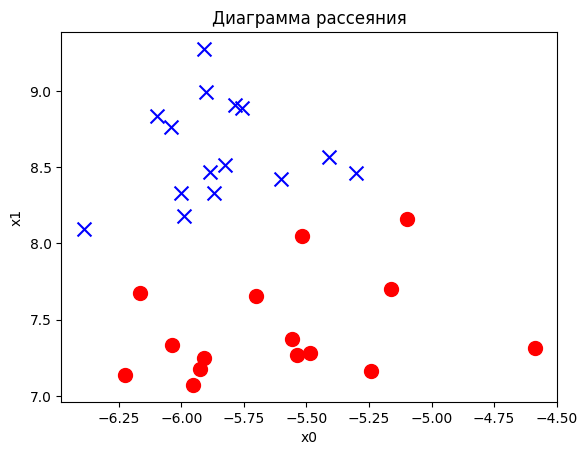

In [4]:
# Изобразим получившийся датасет на графике:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

Точность модели при C = 0.1 : 0.9666666666666667


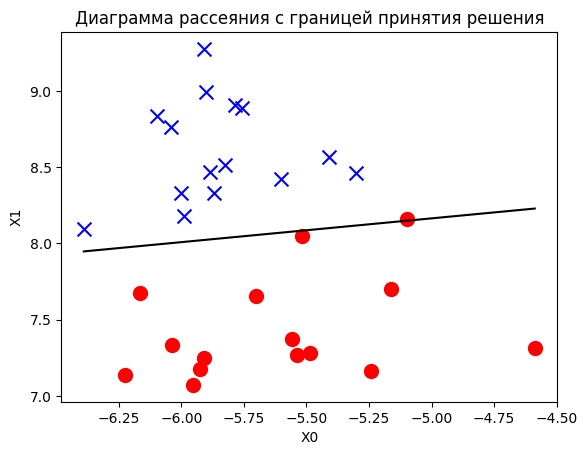

Точность модели при C = 1 : 0.9666666666666667


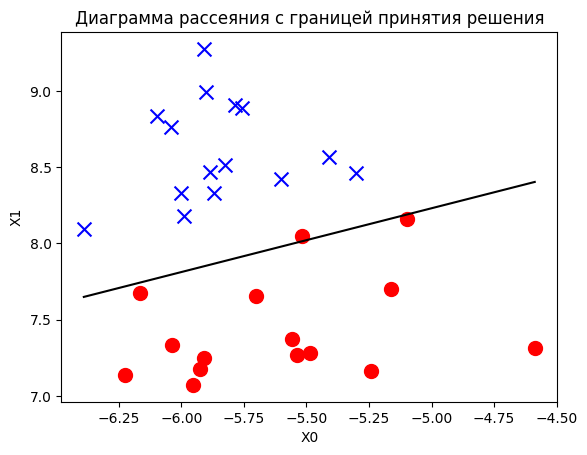

Точность модели при C = 10 : 1.0


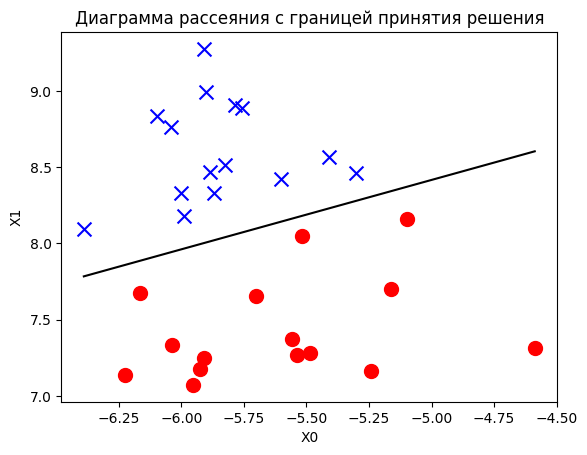

In [7]:
# Экспериментируем с различными значениями аргумента C
for c in [0.1, 1, 10]:
    # Инициализируем классификатор методом опорных векторов с различным значением C
    clf = svm.SVC(C=c, kernel='linear')

    # Обучаем модель на всем датасете
    clf.fit(X, y)

    # Делаем предсказания на всем датасете
    y_pred = clf.predict(X)

    # Оцениваем точность модели
    accuracy = accuracy_score(y, y_pred)
    print("Точность модели при C =", c, ":", accuracy)

    # Визуализируем границу принятия решений и зазор
    # decision_boundary(clf, X, y)

    # выводим коэффициенты линейной функции
    clf.coef_
    clf.intercept_

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

    plt.plot(X0,-clf.intercept_[0]/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*X0, c='k')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    plt.title("Диаграмма рассеяния c границей принятия решения")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

## ЗАДАНИЕ №2

В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

Предсказание для новой точки: [0]


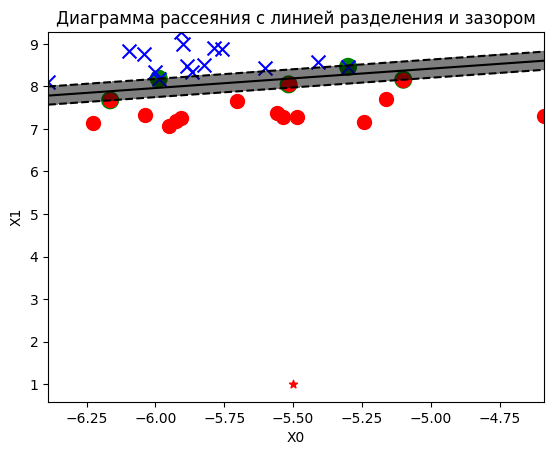

In [8]:
# Подвигаем точку нового предсказания
new_point = [[-5.50, 1]]
plt.scatter(new_point[0][0], new_point[0][1], color='red', marker='*')

# Предсказываем класс для новой точки
prediction = clf.predict(new_point)
print("Предсказание для новой точки:", prediction)

# Визуализируем границу решения
plot_decision_regions(X, y, clf)

## ЗАДАНИЕ №3

Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

In [9]:
# Создание модели классификации с разными видами ядер
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = []

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X, y)
    svm_models.append(svm_model)


# Вычисление точности модели для каждого вида ядра
accuracy = []

for i, kernel in enumerate(kernels):
    print('Kernel:', kernel)
    print('Accuracy:', svm_models[i].score(X, y))
    accuracy.append(svm_models[i].score(X, y))

Kernel: linear
Accuracy: 0.9666666666666667
Kernel: poly
Accuracy: 1.0
Kernel: rbf
Accuracy: 1.0
Kernel: sigmoid
Accuracy: 0.23333333333333334


## ЗАДАНИЕ №4

В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

In [10]:
# Создание модели классификации с разными видами ядер
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = []
accuracy1 = []

# Изменение значения аргумента C
Cs = [0.001, 0.1, 10, 100]

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X, y)
    svm_models.append(svm_model)
for C in Cs:
    for i in range(len(kernels)):
        svm_models[i].set_params(C=C)
        svm_models[i].fit(X, y)
        accuracy1.append(svm_models[i].score(X, y))
        print("Точность модели при C =", C, "и ядре", kernels[i], ":", accuracy1[i])

# Вычисление точности модели для каждого вида ядра
accuracy = []

for i, kernel in enumerate(kernels):
    print('Kernel:', kernel)
    print('Accuracy:', svm_models[i].score(X, y))
    accuracy.append(svm_models[i].score(X, y))



Точность модели при C = 0.001 и ядре linear : 1.0
Точность модели при C = 0.001 и ядре poly : 1.0
Точность модели при C = 0.001 и ядре rbf : 1.0
Точность модели при C = 0.001 и ядре sigmoid : 0.23333333333333334
Точность модели при C = 0.1 и ядре linear : 1.0
Точность модели при C = 0.1 и ядре poly : 1.0
Точность модели при C = 0.1 и ядре rbf : 1.0
Точность модели при C = 0.1 и ядре sigmoid : 0.23333333333333334
Точность модели при C = 10 и ядре linear : 1.0
Точность модели при C = 10 и ядре poly : 1.0
Точность модели при C = 10 и ядре rbf : 1.0
Точность модели при C = 10 и ядре sigmoid : 0.23333333333333334
Точность модели при C = 100 и ядре linear : 1.0
Точность модели при C = 100 и ядре poly : 1.0
Точность модели при C = 100 и ядре rbf : 1.0
Точность модели при C = 100 и ядре sigmoid : 0.23333333333333334
Kernel: linear
Accuracy: 1.0
Kernel: poly
Accuracy: 1.0
Kernel: rbf
Accuracy: 1.0
Kernel: sigmoid
Accuracy: 0.16666666666666666


## ЗАДАНИЕ №5

В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

In [13]:
# Создание модели классификации с разными видами ядер
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = []

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X, y)
    svm_models.append(svm_model)
linear_svm_model = LinearSVC()
linear_svm_model.fit(X, y)
print('Accuracy of Linear SVC:', linear_svm_model.score(X, y))

# Вычисление точности модели для каждого вида ядра
accuracy = []

for i, kernel in enumerate(kernels):
    print('Kernel:', kernel)
    print('Accuracy:', svm_models[i].score(X, y))
    accuracy.append(svm_models[i].score(X, y))

Accuracy of Linear SVC: 0.8
Kernel: linear
Accuracy: 0.9666666666666667
Kernel: poly
Accuracy: 1.0
Kernel: rbf
Accuracy: 1.0
Kernel: sigmoid
Accuracy: 0.23333333333333334


d:\Питон 3.12\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Питон 3.12\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## ЗАДАНИЕ №6

Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [3]:
# Создание синтетического датасета для классификации
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение параметров для подбора
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Создание модели SVM
svm_model = SVC()

# Подбор оптимальных параметров с использованием GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод результатов подбора
print("Наилучшие параметры:", grid_search.best_params_)
print("Наилучшая точность:", grid_search.best_score_)

# Применение наилучшей модели к тестовому набору
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

# Оценка точности на тестовом наборе
accuracy = accuracy_score(y_test, y_pred)
print("Точность на тестовом наборе:", accuracy)

Наилучшие параметры: {'C': 100, 'kernel': 'rbf'}
Наилучшая точность: 0.8737499999999999
Точность на тестовом наборе: 0.875


## ЗАДАНИЕ №7

Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [5]:
# Создание датасета с большим количеством точек
X_large, y_large = make_classification(n_samples=10000, n_features=5, random_state=42)

# Разделение на обучающий и тестовый наборы
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(X_large, y_large, test_size=0.2, random_state=42)

# Создание SVM модели с полиномиальным ядром (можно изменить ядро и параметры)
svm_model_large = SVC(kernel='poly', degree=3, C=1)

# Замер времени начала обучения
start_time_large = time.time()

# Обучение модели на большом датасете
svm_model_large.fit(X_train_large, y_train_large)

# Замер времени окончания обучения
end_time_large = time.time()

# Вывод времени обучения
training_time_large = end_time_large - start_time_large
print(f"Время обучения на большом датасете: {training_time_large:.4f} секунд")


Время обучения на большом датасете: 0.7542 секунд


In [4]:
# Создание датасета с большим количеством точек
X_large, y_large = make_classification(n_samples=100000, n_features=5, random_state=42)

# Разделение на обучающий и тестовый наборы
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(X_large, y_large, test_size=0.2, random_state=42)

# Создание SVM модели с полиномиальным ядром (можно изменить ядро и параметры)
svm_model_large = SVC(kernel='poly', degree=3, C=1)

# Замер времени начала обучения
start_time_large = time.time()

# Обучение модели на большом датасете
svm_model_large.fit(X_train_large, y_train_large)

# Замер времени окончания обучения
end_time_large = time.time()

# Вывод времени обучения
training_time_large = end_time_large - start_time_large
print(f"Время обучения на большом датасете: {training_time_large:.4f} секунд")


Время обучения на большом датасете: 71.5430 секунд


## ЗАДАНИЕ №8

Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

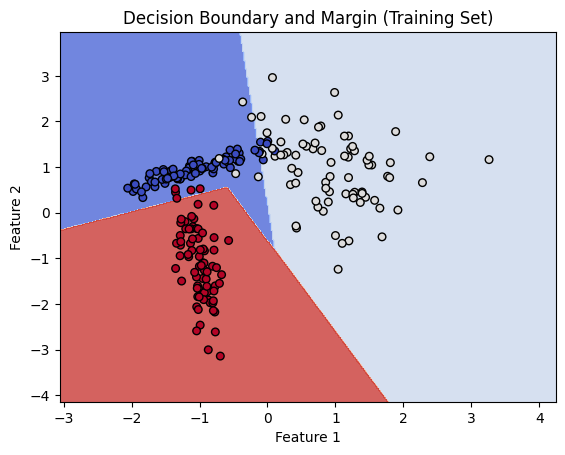

Accuracy on Test Set: 0.90


In [6]:
# Создание сгенерированного датасета
X, y = datasets.make_classification(n_samples=300, n_features=2, n_informative=2,
                                    n_redundant=0, n_classes=3, n_clusters_per_class=1,
                                    random_state=42)

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Визуализация границы принятия решений и зазора
def plot_decision_boundary(X, y, model, title):
    h = .02  # Шаг сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=30)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Визуализация границы принятия решений и зазора
plot_decision_boundary(X_train, y_train, svm_model, 'Decision Boundary and Margin (Training Set)')

# Оценка точности на тестовом наборе данных
accuracy = svm_model.score(X_test, y_test)
print(f"Accuracy on Test Set: {accuracy:.2f}")

## ЗАДАНИЕ №9

Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [10]:
# Загрузка датасета Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели SVM для классификации
svm_model_iris = SVC(kernel='linear', C=1)
svm_model_iris.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = svm_model_iris.predict(X_test)

# Оценка точности и матрицы ошибок
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Точность на тестовом наборе: {accuracy:.2f}")
print("Матрица ошибок:")
print(conf_matrix)

Точность на тестовом наборе: 1.00
Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## ЗАДАНИЕ №10

Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [5]:
# Загрузка набора данных по ценам на жилье в Калифорнии
california_housing = fetch_california_housing()
X_regression = california_housing.data
y_regression = california_housing.target

# Разделение набора данных на обучающую и тестовую выборки
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# Создание и обучение модели SVR для регрессии
svm_model_regression_california = SVR(kernel='linear', C=1)
svm_model_regression_california.fit(X_train_regression, y_train_regression)

# Предсказание на тестовом наборе данных
y_pred_regression_california = svm_model_regression_california.predict(X_test_regression)

# Оценка среднеквадратической ошибки и коэффициента детерминации
mse_california = mean_squared_error(y_test_regression, y_pred_regression_california)
r2_california = r2_score(y_test_regression, y_pred_regression_california)

print(f"Среднеквадратическая ошибка на тестовом наборе: {mse_california:.2f}")
print(f"Коэффициент детерминации на тестовом наборе: {r2_california:.2f}")


Среднеквадратическая ошибка на тестовом наборе: 1.18
Коэффициент детерминации на тестовом наборе: 0.10
